#Task : 4
#SALES PREDICTION USING PYTHON

* Sales prediction involves forecasting the amount of a product that
customers will purchase, taking into account various factors such as
advertising expenditure, target audience segmentation, and
advertising platform selection.
* In businesses that offer products or services, the role of a Data
Scientist is crucial for predicting future sales. They utilize machine
learning techniques in Python to analyze and interpret data, allowing
them to make informed decisions regarding advertising costs. By
leveraging these predictions, businesses can optimize their
advertising strategies and maximize sales potential. Let's embark on the journey of sales prediction using machine learning in Python.

In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings("ignore")

#Read Dataset

In [69]:
df = pd.read_csv('/content/car_purchasing.csv',  encoding='latin-1')
df.head()

,customer name,customer e-mail,country,gender,age,annual Salary,credit card debt,net worth,car purchase amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248


#EDA

In [70]:
df.select_dtypes('object')

,customer name,customer e-mail,country
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil
...,...,...,...
495,Walter,ligula@Cumsociis.ca,Nepal
496,Vanna,Cum.sociis.natoque@Sedmolestie.edu,Zimbabwe
497,Pearl,penatibus.et@massanonante.com,Philippines
498,Nell,Quisque.varius@arcuVivamussit.net,Botswana


In [71]:
df.select_dtypes('object').nunique()

customer name      498
customer e-mail    500
country            211
dtype: int64

In [72]:
df.drop(columns= ['customer name' , 'customer e-mail' ,'country' , 'gender' ] , axis = 1 , inplace = True)

In [73]:
df

,age,annual Salary,credit card debt,net worth,car purchase amount
0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,57.313749,59729.15130,5358.712177,560304.0671,55915.46248
...,...,...,...,...,...
495,41.462515,71942.40291,6995.902524,541670.1016,48901.44342
496,37.642000,56039.49793,12301.456790,360419.0988,31491.41457
497,53.943497,68888.77805,10611.606860,764531.3203,64147.28888
498,59.160509,49811.99062,14013.034510,337826.6382,45442.15353


In [74]:
target = 'car purchase amount'
X = df.drop(target , axis= 1)
y= df[target]

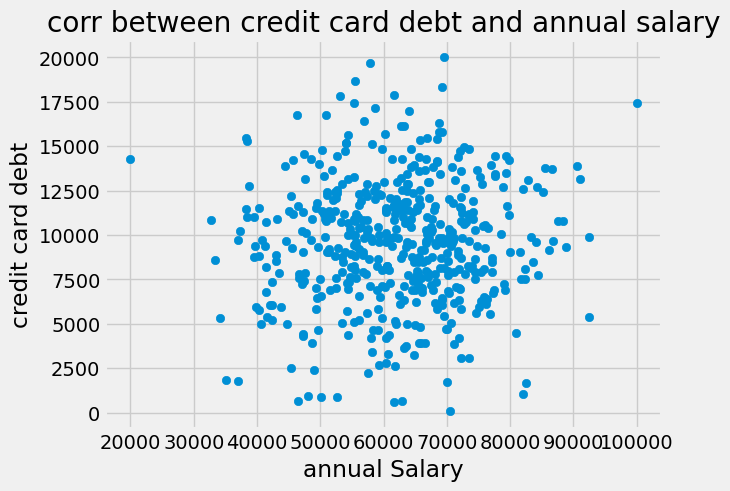

In [75]:
plt.scatter(df['annual Salary'] , df['credit card debt'])
plt.xlabel('annual Salary')
plt.ylabel('credit card debt')
plt.title('corr between credit card debt and annual salary');

In [76]:
fig = px.scatter(x= df['annual Salary'] , y= df['car purchase amount'] , title = 'corr between annual salary and car purchase amountcar purchase amount ')
fig.update_layout(xaxis_title= 'annual Salary' , yaxis_title = 'car purchase amount')
fig.show()

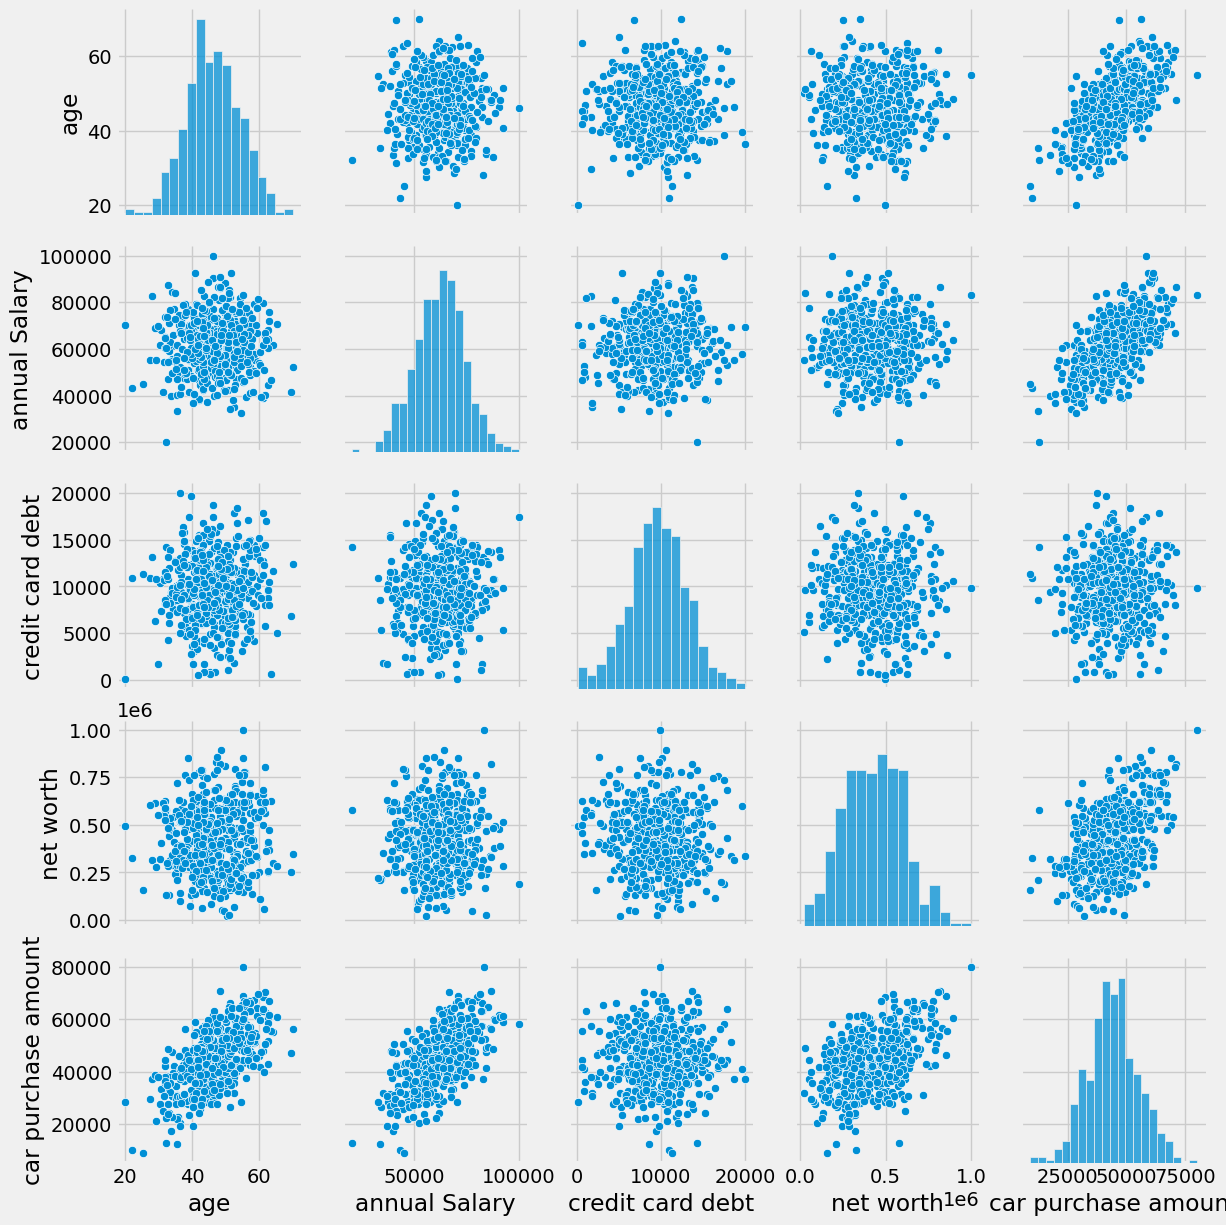

In [77]:
sns.pairplot(df);

In [78]:
print(f'The shape of X is {X.shape}')
print(f'The shape of y is {y.shape}')

The shape of X is (500, 4)
The shape of y is (500,)


#Data Scaling

In [79]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X = scaler.fit_transform(X)
y = scaler.fit_transform(y.values.reshape(-1 , 1))

#Feature Engineering

In [80]:
from sklearn.model_selection import train_test_split

X_train , X_test , y_train , y_test = train_test_split(X, y , test_size = 0.2 , random_state = 42)

print(f'the shape of X train is {X_train.shape}')
print(f'the shape of y train is {y_train.shape}')
print(f'the shape of X test is {X_test.shape}')
print(f'the shape of y test is {y_test.shape}')

the shape of X train is (400, 4)
the shape of y train is (400, 1)
the shape of X test is (100, 4)
the shape of y test is (100, 1)


In [81]:
from sklearn.metrics import mean_absolute_error

y_mean = y_train.mean()
y_pred_baseline= [y_mean] * len(y_train)
print("Mean apt price:", y_mean)

print("Baseline MAE:", mean_absolute_error(y_train,y_pred_baseline))

Mean apt price: 0.49219817948908456
Baseline MAE: 0.11921386215413556


#Model Structure

In [82]:
from keras.layers import Dense
from keras.models import Sequential

model = Sequential()
model.add(Dense(10, activation='relu', input_dim=4))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='linear'))

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 10)                50        
                                                                 
 dense_10 (Dense)            (None, 10)                110       
                                                                 
 dense_11 (Dense)            (None, 1)                 11        
                                                                 
Total params: 171
Trainable params: 171
Non-trainable params: 0
_________________________________________________________________


#Epochs iterate

In [83]:
history = model.fit(X_train , y_train , epochs = 50 , validation_split= 0.2)

Epoch 1/50
10/10 [==============================] - 1s 25ms/step - loss: 0.2963 - mean_absolute_error: 0.5182 - val_loss: 0.2460 - val_mean_absolute_error: 0.4751
Epoch 2/50
10/10 [==============================] - 0s 6ms/step - loss: 0.2528 - mean_absolute_error: 0.4762 - val_loss: 0.2064 - val_mean_absolute_error: 0.4328
Epoch 3/50
10/10 [==============================] - 0s 6ms/step - loss: 0.2117 - mean_absolute_error: 0.4329 - val_loss: 0.1693 - val_mean_absolute_error: 0.3899
Epoch 4/50
10/10 [==============================] - 0s 7ms/step - loss: 0.1744 - mean_absolute_error: 0.3895 - val_loss: 0.1349 - val_mean_absolute_error: 0.3454
Epoch 5/50
10/10 [==============================] - 0s 8ms/step - loss: 0.1389 - mean_absolute_error: 0.3437 - val_loss: 0.1040 - val_mean_absolute_error: 0.3000
Epoch 6/50
10/10 [==============================] - 0s 6ms/step - loss: 0.1068 - mean_absolute_error: 0.2961 - val_loss: 0.0760 - val_mean_absolute_error: 0.2521
Epoch 7/50
10/10 [=========

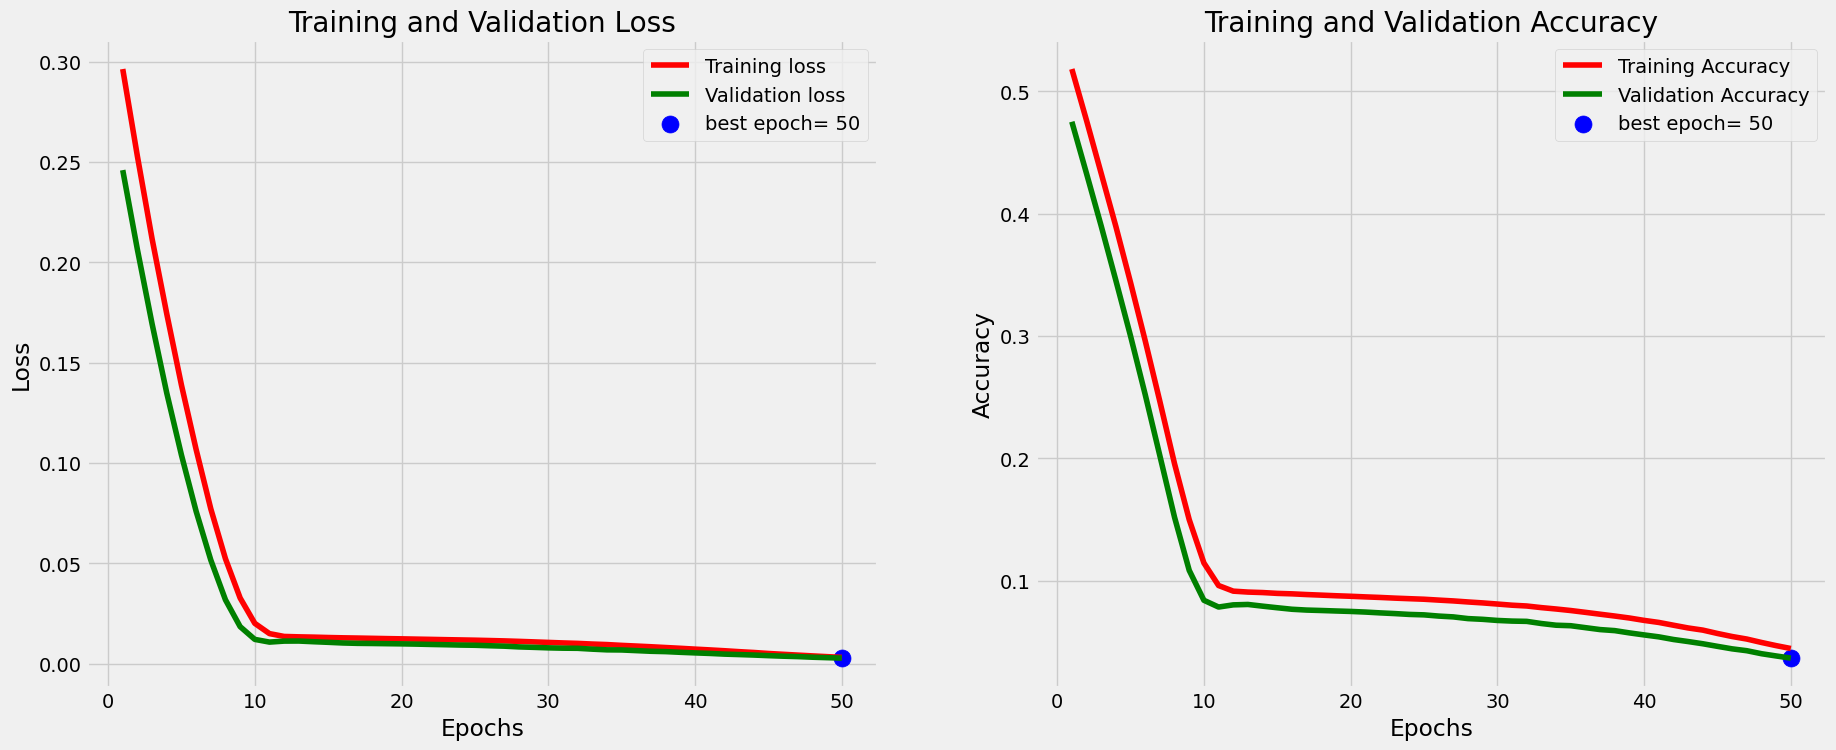

In [84]:
tr_acc = history.history['mean_absolute_error']
tr_loss = history.history['loss']
val_acc = history.history['val_mean_absolute_error']
val_loss = history.history['val_loss']
index_loss = np.argmin(val_loss)
val_lowest = val_loss[index_loss]
index_acc = np.argmin(val_acc)
acc_highest = val_acc[index_acc]
Epochs = [i+1 for i in range(len(tr_acc))]
loss_label = f'best epoch= {str(index_loss + 1)}'
acc_label = f'best epoch= {str(index_acc + 1)}'

# Plot training history
plt.figure(figsize= (20, 8))
plt.style.use('fivethirtyeight')

plt.subplot(1, 2, 1)
plt.plot(Epochs, tr_loss, 'r', label= 'Training loss')
plt.plot(Epochs, val_loss, 'g', label= 'Validation loss')
plt.scatter(index_loss + 1, val_lowest, s= 150, c= 'blue', label= loss_label)
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(Epochs, tr_acc, 'r', label= 'Training Accuracy')
plt.plot(Epochs, val_acc, 'g', label= 'Validation Accuracy')
plt.scatter(index_acc + 1 , acc_highest, s= 150, c= 'blue', label= acc_label)
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout
plt.show()

In [85]:
y_pred = model.predict(X_test)

4/4 [==============================] - 0s 5ms/step


In [86]:
from sklearn.metrics import r2_score

In [87]:
test_acc = r2_score(y_test , y_pred)
print(f'R2 Score = {test_acc}')

R2 Score = 0.8962677292857048
